<a href="https://colab.research.google.com/github/AbdullatifHabiba/-Network-Anomaly-Detection/blob/main/network_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import random
import numpy as np
import scipy as sc
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with ZipFile("/content/drive/MyDrive/corrected.zip", "r") as folders:
  folders.extractall("corrected")
with ZipFile("/content/drive/MyDrive/kddcup.data.zip", "r") as folders:
  folders.extractall("data")
with ZipFile("/content/drive/MyDrive/kddcup.data_10_percent.zip", "r") as folders:
  folders.extractall("data_10")

Reading Trainng Data and test Data

In [ ]:
# here we replace each column value that is categorical to numeric value for all training data
Training = pd.read_csv('data/kddcup.data.txt', names = range(42))
Training[1] = Training[1].replace(to_replace=Training[1].unique(), value=range(len(Training[1].unique())))
Training[2] = Training[2].replace(to_replace=Training[2].unique(), value=range(len(Training[2].unique())))
Training[3] = Training[3].replace(to_replace=Training[3].unique(), value=range(len(Training[3].unique())))
Training_labels = (Training[41].replace(to_replace=Training[41].unique(), value=range(len(Training[41].unique())))).to_numpy()
Training = (Training.drop([41], axis=1)).to_numpy()

# here we replace each column value that is categorical to numeric value for kddcup.data_10_percent.gz
Training_10 = pd.read_csv('data_10/kddcup.data_10_percent.txt', names = range(42))
Training_10[1] = Training_10[1].replace(to_replace=Training_10[1].unique(), value=range(len(Training_10[1].unique())))
Training_10[2] = Training_10[2].replace(to_replace=Training_10[2].unique(), value=range(len(Training_10[2].unique())))
Training_10[3] = Training_10[3].replace(to_replace=Training_10[3].unique(), value=range(len(Training_10[3].unique())))
Training_10_labels = (Training_10[41].replace(to_replace=Training_10[41].unique(), value=range(len(Training_10[41].unique())))).to_numpy()
Training_10 = (Training_10.drop([41], axis=1)).to_numpy()

# here we replace each column value that is categorical to numeric value for all corrected data
Testing = pd.read_csv('corrected/corrected', names = range(42))
Testing[1] = Testing[1].replace(to_replace=Testing[1].unique(), value=range(len(Testing[1].unique())))
Testing[2] = Testing[2].replace(to_replace=Testing[2].unique(), value=range(len(Testing[2].unique())))
Testing[3] = Testing[3].replace(to_replace=Testing[3].unique(), value=range(len(Testing[3].unique())))
Testing_labels = (Testing[41].replace(to_replace=Testing[41].unique(), value=range(len(Testing[41].unique())))).to_numpy()
Testing = (Testing.drop([41], axis=1)).to_numpy()

#K_Means Algorithm

Assumption we make max iteration to 100

In [ ]:
class K_means:

    def __init__(self, Data, k):
        self.Data = Data
        self.k = k
        self.Clusters = [-1 for i in range(len(self.Data))]
        self.newClusters = [-1 for i in range(len(self.Data))]
        self.means = []
        for i in random.sample(range(0, len(self.Data)), self.k):
          self.means.append(self.Data[i])
        self.n_repeats = [0 for i in range(self.k)]
        self.newMeans = np.zeros((self.k, len(self.Data[0])))

    def K_MEANS(self):
        count = 0
        while(True):
          self.n_repeats = [0 for i in range(self.k)]
          self.newMeans = np.zeros((self.k, len(self.Data[0])))
          for i in range(len(self.Data)):
            minIndex = np.argmin(np.sum((self.means - self.Data[i])** 2, axis=-1))
            self.newClusters[i] = minIndex
            self.n_repeats[minIndex] = self.n_repeats[minIndex] + 1
            self.newMeans[minIndex] = np.array(self.newMeans[minIndex]) + np.array(self.Data[i])
          for i in range(self.k):
            if self.n_repeats[i] == 0:
              self.newMeans[i] = self.means[i].copy()
            else:
              self.newMeans[i] = np.array(self.newMeans[i]) / float(self.n_repeats[i])
          if np.all(self.Clusters == self.newClusters.copy()):
            break
          count = count + 1
          self.Clusters = self.newClusters.copy()
          self.means = self.newMeans.copy()
        print(f"number of iterations = {count}")
        print(f"number of items in each cluster = {self.n_repeats}")
        return self.Clusters, self.means

Prediction function that use the means produced from k-means
and predict the corrected data to classify it according to these means

In [ ]:
def predictTesting(Testing, means):
  TestingLabels=[]
  for item in Testing :
     minIndex = np.argmin(np.sum((means - np.array(item))** 2, axis=-1))
     TestingLabels.append(minIndex)
  return TestingLabels

Calculate k-means labels when k=7 and its predicted corrected data

In [ ]:
Clusters_7, TrainingMeans = K_means(Training_10, 7).K_MEANS()
TestingClusters = predictTesting(Testing, TrainingMeans)

number of iterations = 36
number of items in each cluster = [1, 491482, 21, 18, 82, 2341, 76]


Calculate k-means labels when k=15 and its predicted corrected data

In [ ]:
Clusters_15, TrainingMeans = K_means(Training_10, 15).K_MEANS()
TestingClusters_15 = predictTesting(Testing, TrainingMeans)

number of iterations = 68
number of items in each cluster = [67, 189373, 82, 2271, 108, 1017, 1178, 22, 1, 973, 6330, 8943, 18, 17, 283621]


Calculate k-means labels when k=23 and its predicted corrected data

In [ ]:
Clusters_23,TrainingMeans = K_means(Training_10, 23).K_MEANS()
TestingClusters_23 = predictTesting(Testing, TrainingMeans)

number of iterations = 151
number of items in each cluster = [42, 2271, 16223, 9484, 574, 15, 274, 1, 56, 82, 105, 170922, 52795, 1216, 711, 3367, 5725, 18, 1694, 5, 227856, 565, 20]


Calculate k-means labels when k=31 and its predicted corrected data

In [ ]:
Clusters_31, TrainingMeans = K_means(Training_10, 31).K_MEANS()
TestingClusters_31 = predictTesting(Testing, TrainingMeans)

number of iterations = 246
number of items in each cluster = [82, 2271, 105, 573, 19, 711, 565, 43, 13, 11833, 18, 151934, 1228, 1, 3556, 60, 5334, 5, 535, 9624, 3364, 1082, 186, 20216, 6984, 1798, 12, 33986, 10019, 227854, 10]


Calculate k-means labels when k=45 and its predicted corrected data

In [ ]:
Clusters_45, TrainingMeans = K_means(Training_10, 45).K_MEANS()
TestingClusters_45 = predictTesting(Testing, TrainingMeans)

# **Normalized Cut**
• Set the random seed across all experiments to 42


• Split the training dataset used using train test split in sklearn, and take
only 0.15% of the data in the new training set. Be sure you set stratify =True.

• Apply Normalized Cut algorithm to the preprocessed data to cluster the
data into 23 clusters.

• Rerun the experiments on K-Means when K=11

• Compare the results of K-Means and Normalized Cut clustering in terms
of the number of detected anomalies and their characteristics.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
def Normalized_Cut(data, n_clusters):
    sim_mat = rbf_kernel(data, gamma=1)
    row_sums = np.sum(sim_mat, axis=1)
    deg_mat = np.diag(row_sums)
    laplace_mat = deg_mat - sim_mat
    eigvals, eigvecs = np.linalg.eigh(laplace_mat)
    indices = np.argsort(eigvals)[:n_clusters]
    eigvecs = eigvecs[:,indices] / np.linalg.norm(eigvecs[:,indices], axis=1, keepdims=True)
    cluster_assignment, means = K_means(eigvecs, n_clusters).K_MEANS()
    return cluster_assignment

In [ ]:
from sklearn.preprocessing import StandardScaler
Training_15, Test, Label_15, TestLabel = train_test_split(Training,Training_labels,test_size = .9985, random_state = 42)
scaler = StandardScaler()
Training_15 = scaler.fit_transform(Training_15[:,:41])


In [ ]:
Normalized_res = Normalized_Cut(Training_15, 11)

number of iterations = 6
number of items in each cluster = [4, 26, 43, 56, 3, 5, 19, 1254, 73, 5485, 379]


In [ ]:
print(Normalized_res[0])

9


In [ ]:
kmeans_res = K_means(Training_15, 11).K_MEANS()

number of iterations = 19
number of items in each cluster = [5, 1259, 54, 57, 270, 1026, 532, 2934, 279, 411, 520]


In [ ]:
print(np.array(kmeans_res)[0])

print(np.array(Normalized_res)[0])

[6, 10, 6, 10, 7, 9, 7, 5, 7, 7, 9, 1, 6, 7, 5, 1, 7, 7, 10, 6, 7, 7, 8, 7, 9, 4, 9, 1, 8, 5, 1, 7, 7, 9, 1, 5, 7, 1, 3, 5, 7, 6, 7, 7, 7, 2, 6, 7, 5, 1, 8, 4, 5, 7, 7, 5, 7, 9, 9, 1, 1, 7, 6, 9, 7, 5, 2, 7, 10, 10, 7, 5, 9, 6, 5, 1, 1, 7, 7, 9, 6, 7, 8, 5, 4, 1, 10, 7, 7, 9, 7, 6, 7, 9, 7, 9, 1, 5, 7, 1, 7, 9, 7, 1, 7, 6, 8, 7, 4, 5, 1, 1, 5, 7, 7, 7, 5, 7, 7, 7, 1, 7, 9, 10, 1, 5, 7, 8, 5, 1, 6, 1, 7, 9, 9, 5, 7, 7, 7, 1, 4, 5, 4, 6, 7, 1, 5, 1, 10, 9, 9, 7, 5, 1, 7, 7, 7, 5, 8, 7, 7, 7, 1, 7, 1, 7, 5, 7, 2, 1, 9, 4, 1, 7, 1, 7, 1, 10, 1, 10, 7, 4, 6, 5, 7, 7, 1, 7, 7, 7, 10, 7, 7, 10, 8, 7, 1, 10, 5, 7, 5, 7, 7, 1, 7, 5, 1, 8, 1, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 7, 7, 1, 5, 7, 10, 8, 10, 5, 7, 1, 8, 7, 10, 10, 7, 7, 1, 6, 6, 7, 1, 7, 7, 7, 7, 7, 6, 5, 9, 10, 7, 1, 1, 5, 6, 5, 7, 1, 9, 7, 9, 5, 7, 4, 5, 7, 1, 9, 10, 1, 5, 7, 8, 5, 7, 9, 7, 5, 7, 5, 4, 7, 7, 7, 5, 1, 7, 1, 4, 9, 1, 5, 4, 1, 7, 7, 7, 5, 1, 3, 7, 7, 7, 7, 8, 6, 7, 5, 8, 4, 5, 4, 8, 10, 1, 1, 5, 7, 7, 7, 5, 1, 7, 5, 7, 1

<ipython-input-16-8290814f68f8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(kmeans_res)[0])


#New Clustring Algorithm

In [ ]:
# revise and take min points in distance
def DBSCAN(dataset, eps, minpts=3, distanceMethod='euclidean'): # eps >> distance >> radius , minpts>=D+1>> n + 1
  # for m * n data matrix
  m, n = dataset.shape
  # for debugging
  print(n)
  print(m)
  vis = np.zeros(m, 'int')
  type = np.zeros(m)

  listOfClusters = []
  cluster = []
  clustNumOfPoint = np.zeros(m) # cluster num for each point
  clustInd = 1 # start ind
  pointNeighbors = [] #neighbors for each point
  #get distance matrix using euclidean as default
  distanceMat = sc.spatial.distance.squareform(
      sc.spatial.distance.pdist(dataset, distanceMethod))

  print(distanceMat)

  # loop on each point >> vis >> collect around it
  # if not vis >> flood fill >> in DFS >> connected components
  for i in range(m):
   # print(dataset[i])
    if vis[i] == 0:
      # cluster means current cluster
      cluster.clear()
      pointNeighbors.clear()
      cluster.append(i) # add cur point to this cluster
      clustNumOfPoint[i] = clustInd #add this cluster number to the point
      min = minpts

      for ind in range(distanceMat.shape[1]):
        if vis[ind] == 0 and distanceMat[i][ind] < eps and min > 0:
          pointNeighbors.append(ind)
          min -= 1      # expand the cluster by adding the valid neighbors to this cluster


      print(pointNeighbors)

      for j in pointNeighbors:
       # loop on neighbors >> if not visited >> vis &
       if vis[j] == 0:
         vis[j] = 1
         cluster.append(j)
         clustNumOfPoint[j] = clustInd
      print(cluster)
      #append the neighbors to current clusters
      #cluster.append(pointNeighbors[:])
      #add the cluster to the list of clusters
      listOfClusters.append(cluster[:])
      # start new cluster
      clustInd = clustInd + 1

  return clustNumOfPoint


In [ ]:
arr = DBSCAN(Training_15, 500, 1000) #450 و 600

41
7347
[[0.         0.38725352 0.0062423  ... 0.0062423  0.35715491 0.0062423 ]
 [0.38725352 0.         0.38488163 ... 0.38971097 0.1560576  0.38971097]
 [0.0062423  0.38488163 0.         ... 0.01248461 0.35731853 0.01248461]
 ...
 [0.0062423  0.38971097 0.01248461 ... 0.         0.35710036 0.        ]
 [0.35715491 0.1560576  0.35731853 ... 0.35710036 0.         0.35710036]
 [0.0062423  0.38971097 0.01248461 ... 0.         0.35710036 0.        ]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 13

In [ ]:
print(arr)

[1. 1. 1. ... 8. 8. 8.]


#Evaluation

Precision
• Recall
• F1 score

In [ ]:
def Precision_F1(Estimated_labels,GroundTruth_labels):
    convolutionM = confusion_matrix(GroundTruth_labels,Estimated_labels)
    plt.figure(figsize=(15,12))
    sn.heatmap(convolutionM,annot=True)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show() # plot confusion matrix
    Report=classification_report(GroundTruth_labels,Estimated_labels)
    print(Report)

Conditional entropy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import entropy

def calculateEntropy(Estimated,GrounfTruth):
    conf_mat = confusion_matrix(GrounfTruth,Estimated )
    cond_entropy = entropy(np.sum(conf_mat, axis=1)) - entropy(conf_mat.T)
    return  cond_entropy

For K-means with k=7

In [ ]:
Precision_F1(Clusters_7,Training_10_labels);

In [ ]:
calculateEntropy(Clusters_7,Training_10_labels)

Testing

In [ ]:
Precision_F1(TestingClusters,Testing_labels);

In [ ]:
calculateEntropy(TestingClusters,Testing_labels)

For k-means k=15

In [ ]:
Precision_F1(Clusters_15,Training_10_labels);

In [ ]:
calculateEntropy(Clusters_15,Training_10_labels)

Testing

In [ ]:
Precision_F1(TestingClusters_15,Testing_labels);

In [ ]:
calculateEntropy(TestingClusters_15,Testing_labels)

For k-means k=23

In [ ]:
Precision_F1(Clusters_23,Training_10_labels);

In [ ]:
calculateEntropy(Clusters_23,Training_10_labels)

Testing

In [ ]:
Precision_F1(TestingClusters_23,Testing_labels);

In [ ]:
calculateEntropy(TestingClusters_23,Testing_labels)

For k-means k=45

In [ ]:
Precision_F1(Clusters_45,Training_10_labels);

In [ ]:
calculateEntropy(Clusters_45,Training_10_labels)

Testing

In [ ]:
Precision_F1(TestingClusters_45,Testing_labels);

In [ ]:
calculateEntropy(TestingClusters_45,Testing_labels)

For Normalized

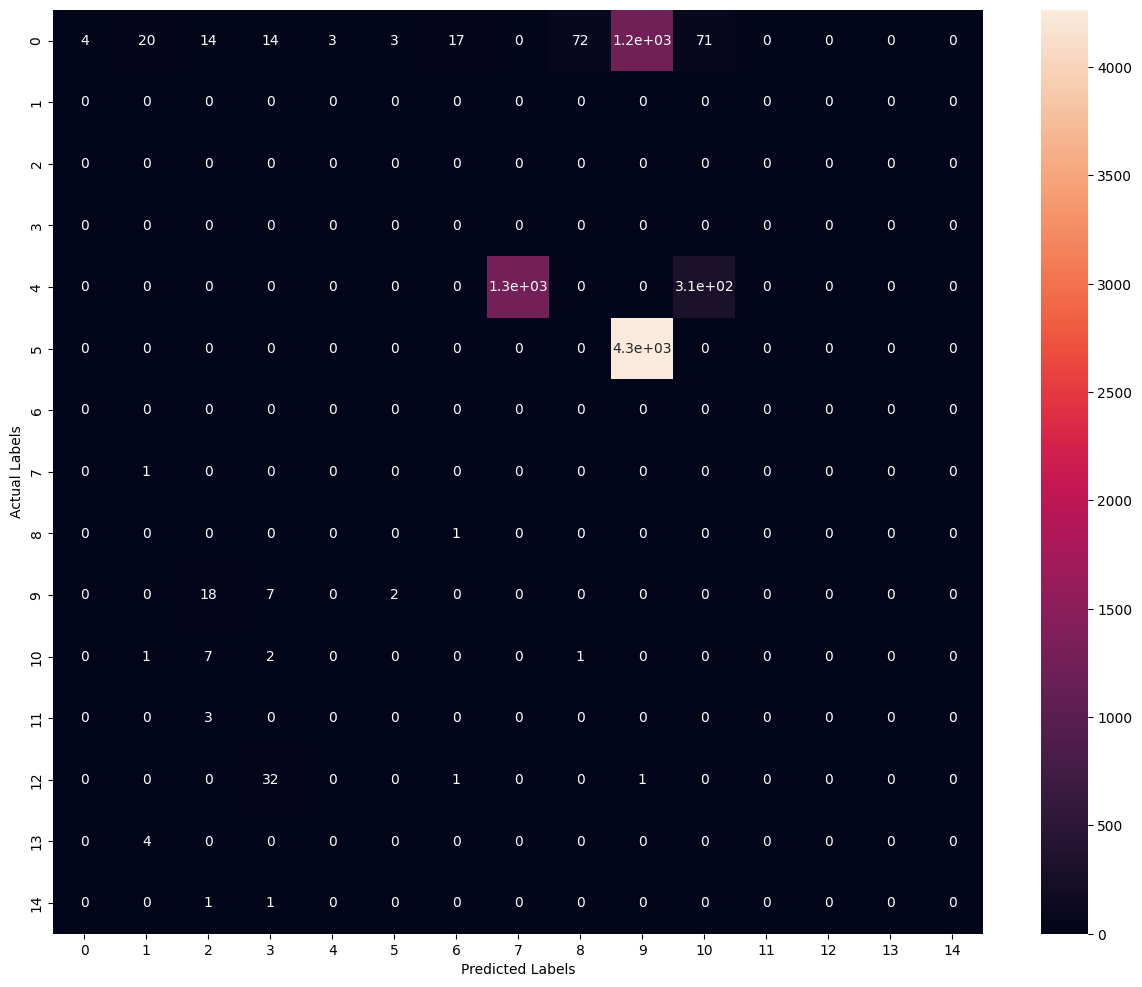

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1437
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00      1562
           5       0.00      0.00      0.00      4265
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        34
          17       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         2

    accuracy                           0.00      7347
   macro avg       0.07      0.00      0.00      7347
weighted avg       0.20   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
Precision_F1(Normalized_res,Label_15);

In [ ]:
calculateEntropy(Normalized_res,Training_15)

New Algorithm

In [ ]:
Precision_F1(arr,Training_15);

In [ ]:
calculateEntropy(arr,Training_15)